In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from collections import defaultdict

In [16]:
N = 100

# P4.1

In [17]:
X = np.random.normal(size=N)
X = X[X > 0]

In [18]:
alpha = 2.5
xmin = 1.0
N = 100000
r = np.random.random(N)
X = xmin * (1 - r) ** (-1 / (alpha - 1))

### Excercise 1

<Axes: ylabel='Count'>

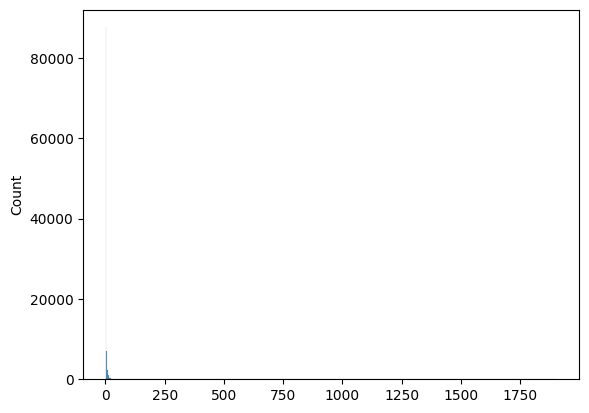

In [19]:
sns.histplot(X)

### Excercise 2

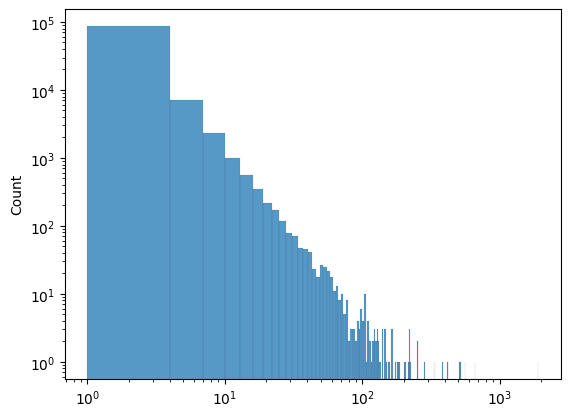

In [20]:
sns.histplot(X)
plt.xscale('log')
plt.yscale('log')

### Excercise 3

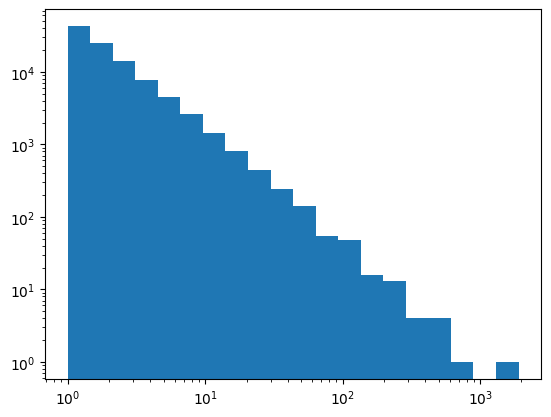

In [21]:
bin_edges = np.logspace(np.log10(X.min()), np.log10(X.max()), 21)
plt.hist(X, bins=bin_edges)
plt.xscale('log')
plt.yscale('log')

### Excercise 4

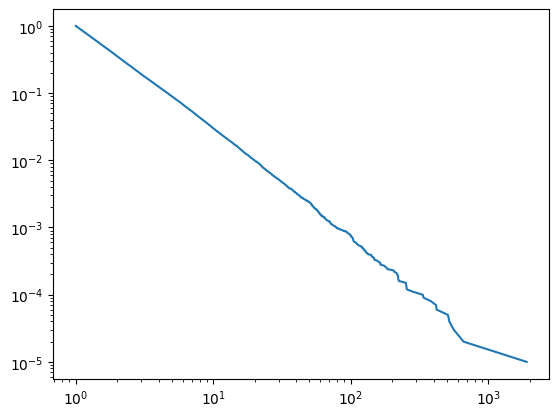

In [22]:
X_positive = X[X > 0]
sorted_X = np.sort(X_positive)
n = len(X_positive)
survival = 1 - np.arange(n) / n

plt.plot(sorted_X, survival)
plt.xscale('log')
plt.yscale('log')

### Excercise 6

In [23]:
X_pos = X[X > 0]
sorted_X = np.sort(X_pos)
survival = 1 - np.arange(len(X_pos)) / len(X_pos)

log_x = np.log(sorted_X)
log_y = np.log(survival)
slope1 = np.polyfit(log_x, log_y, 1)[0]
alpha_survival = -slope1

bin_edges = np.logspace(np.log10(X_pos.min()), np.log10(X_pos.max()), 21)
counts, _ = np.histogram(X_pos, bins=bin_edges)
bin_centers = np.sqrt(bin_edges[:-1] * bin_edges[1:])

log_x = np.log(bin_centers[counts > 0])
log_y = np.log(counts[counts > 0])
slope2 = np.polyfit(log_x, log_y, 1)[0]
alpha_binned = -slope2
 
print(f"α from survival: {alpha_survival:.3f}")
print(f"α from binned: {alpha_binned:.3f}")

α from survival: 1.527
α from binned: 1.580


### Excercise 7

![alt text](4_1_7.png "Title")

In [24]:
x_min = xmin
x_above = X_pos[X_pos >= x_min]

alpha_mle = 1 + len(x_above) / np.sum(np.log(x_above / x_min))
print(f"MLE α = {alpha_mle:.3f}")

MLE α = 2.507


### Excercise 8

In [25]:
x_min = X_pos.min() # we need to estimate x_min
x_above = X_pos[X_pos >= x_min]

alpha_mle = 1 + len(x_above) / np.sum(np.log(x_above / x_min))
print(f"MLE α = {alpha_mle:.3f}")

MLE α = 2.507


# P4.3

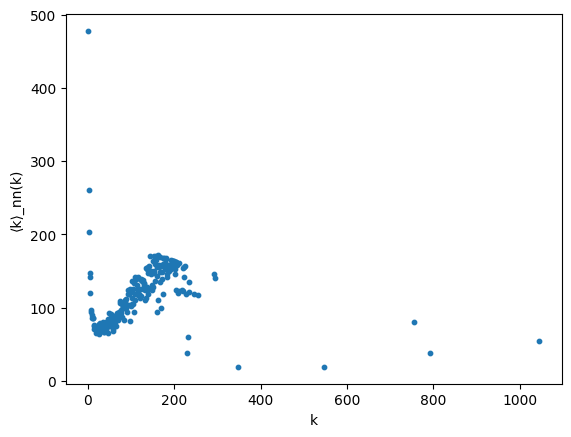

In [30]:
def compute_knn_explicit(G):
    d = dict(G.degree())
    vals = defaultdict(list)
    for n in G:
        k = d[n]
        if k == 0:
            continue
        knn_i = np.mean([d[nb] for nb in G.neighbors(n)])
        vals[k].append(knn_i)
    ks = np.array(sorted(vals.keys()))
    knn_means = np.array([np.mean(vals[k]) for k in ks])
    return ks, knn_means

# G = nx.barabasi_albert_graph(5000, 3)
facebook = pd.read_csv(
    # Dataset from the SNAP database
    "https://snap.stanford.edu/data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")
ks, knn_means = compute_knn_explicit(G)
plt.scatter(ks, knn_means, s=10)
# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('k')
plt.ylabel('⟨k⟩_nn(k)')
plt.show()

# P4.4

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [02:46<00:00, 600.32it/s]


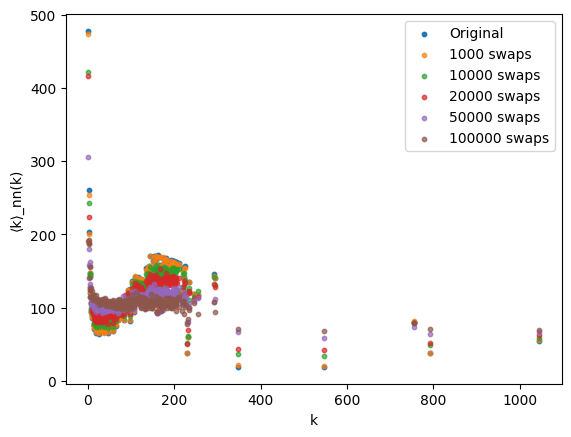

In [34]:
def edge_switch(G, n_swaps):
    edge_list = list(G.edges())
    n_edges = len(edge_list)
    
    for i in tqdm(range(n_swaps)):
        idx1, idx2 = np.random.choice(n_edges, 2, replace=False)
        a, b = edge_list[idx1]
        c, d = edge_list[idx2]
        
        if len({a, b, c, d}) == 4 and not G.has_edge(a, d) and not G.has_edge(c, b):
            G.remove_edges_from([(a, b), (c, d)])
            G.add_edges_from([(a, d), (c, b)])
            edge_list[idx1] = (a, d)
            edge_list[idx2] = (c, b)

def compute_knn(G):
    d = dict(G.degree())
    vals = defaultdict(list)
    for n in G:
        k = d[n]
        if k == 0: 
            continue
        knn_i = np.mean([d[nb] for nb in G.neighbors(n)])
        vals[k].append(knn_i)
    ks = np.array(sorted(vals.keys()))
    knn_means = np.array([np.mean(vals[k]) for k in ks])
    return ks, knn_means

# G = nx.barabasi_albert_graph(5000, 3)
facebook = pd.read_csv(
    # Dataset from the SNAP database
    "https://snap.stanford.edu/data/facebook_combined.txt.gz",
    compression="gzip",
    sep=" ",
    names=["start_node", "end_node"],
)
G = nx.from_pandas_edgelist(facebook, "start_node", "end_node")
ks, knn = compute_knn(G)
plt.scatter(ks, knn, s=10, label='Original')

for n_swaps in [1000, 10000, 20000, 50000, 100000]:
    G2 = G.copy()
    edge_switch(G2, n_swaps)
    ks2, knn2 = compute_knn(G2)
    plt.scatter(ks2, knn2, s=10, alpha=0.7, label=f'{n_swaps} swaps')

# plt.xscale('log')
# plt.yscale('log')
plt.xlabel('k')
plt.ylabel('⟨k⟩_nn(k)')
plt.legend()
plt.show()


# P4.6

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 100000/100000 [02:24<00:00, 693.06it/s]


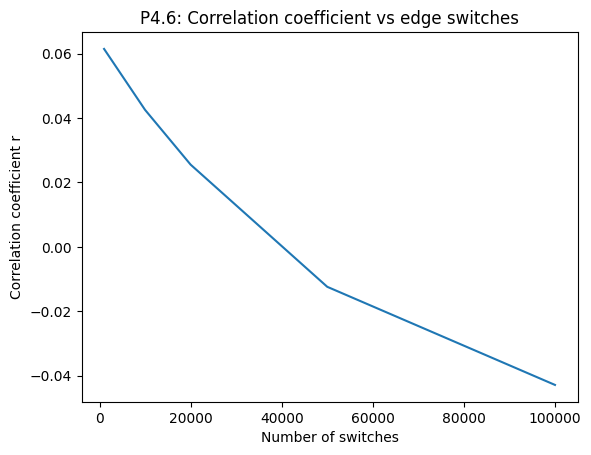

In [37]:
def calculate_r(G):
    degrees = dict(G.degree())
    edges = list(G.edges())
    M = len(edges)
    
    sum_jk = sum(degrees[u] * degrees[v] for u, v in edges)
    sum_j_plus_k = sum(degrees[u] + degrees[v] for u, v in edges)
    sum_j2_plus_k2 = sum(degrees[u]**2 + degrees[v]**2 for u, v in edges)
    
    numerator = sum_jk/M - (sum_j_plus_k/(2*M))**2
    denominator = sum_j2_plus_k2/(2*M) - (sum_j_plus_k/(2*M))**2
    
    return numerator / denominator

swaps_range = [1000, 10000, 20000, 50000, 100000]
r_values = []

for n_swaps in swaps_range:
    G_temp = G.copy()
    if n_swaps > 0:
        edge_switch(G_temp, n_swaps)
    r_values.append(calculate_r(G_temp))

# Plot
sns.lineplot(x=swaps_range, y=r_values)
plt.xlabel('Number of switches')
plt.ylabel('Correlation coefficient r')
plt.title('P4.6: Correlation coefficient vs edge switches')
plt.show()

# P4.7

In [41]:
facebook = pd.read_csv(
    "https://snap.stanford.edu/data/facebook_combined.txt.gz",
    compression="gzip", sep=" ", names=["start_node", "end_node"]
)
arxiv_astro = pd.read_csv(
    "https://snap.stanford.edu/data/ca-AstroPh.txt.gz",
    compression="gzip", sep="\t", names=["start_node", "end_node"]
) 
arxiv_condmat = pd.read_csv(
    "https://snap.stanford.edu/data/ca-CondMat.txt.gz",
    compression="gzip", sep="\t", names=["start_node", "end_node"]
)
email_enron = pd.read_csv(
    "https://snap.stanford.edu/data/email-Enron.txt.gz",
    compression="gzip", sep="\t", names=["start_node", "end_node"]
)
# Convert to NetworkX graphs
G_facebook = nx.from_pandas_edgelist(facebook, "start_node", "end_node")
G_arxiv_astro = nx.from_pandas_edgelist(arxiv_astro, "start_node", "end_node")
G_arxiv_condmat = nx.from_pandas_edgelist(arxiv_condmat, "start_node", "end_node")

networks = {
    'Karate Club': nx.karate_club_graph(),
    'Les Miserables': nx.les_miserables_graph(),
    'Facebook': G_facebook,
    'Arxiv Astro': G_arxiv_astro,
    'Arxiv CondMat': G_arxiv_condmat,
}

/tmp/ipykernel_10666/1723262020.py:5: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  arxiv_astro = pd.read_csv(
/tmp/ipykernel_10666/1723262020.py:13: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  email_enron = pd.read_csv(


In [45]:
results = []

for name, G in tqdm(networks.items()):
    N = G.number_of_nodes()
    E = G.number_of_edges()
    k_avg = 2 * E / N
    
    degrees = [d for n, d in G.degree()]
    k_min = min(degrees)
    degrees_above = [d for d in degrees if d >= k_min]
    alpha = 1 + len(degrees_above) / sum(np.log(np.array(degrees_above) / k_min))
    
    try:
        l_avg = nx.average_shortest_path_length(G)
    except:
        l_avg = float('inf')
    
    r = calculate_r(G)
    
    results.append({
        'Network': name,
        'N': N,
        'E': E,
        '⟨k⟩': round(k_avg, 2),
        'α': round(alpha, 2),
        'ℓ': round(l_avg, 2) if l_avg != float('inf') else '∞',
        'r': round(r, 3)
    })

df = pd.DataFrame(results)
print(df)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:30<00:00,  6.10s/it]

          Network      N       E    ⟨k⟩     α     ℓ      r
0     Karate Club     34      78   4.59  1.78  2.41 -0.476
1  Les Miserables     77     254   6.60  1.69  2.64 -0.165
2        Facebook   4039   88234  43.69  1.32  3.69  0.064
3     Arxiv Astro  33436  263663  15.77  1.51     ∞  0.207
4   Arxiv CondMat  23139   93501   8.08  1.62     ∞  0.136


# P4.9

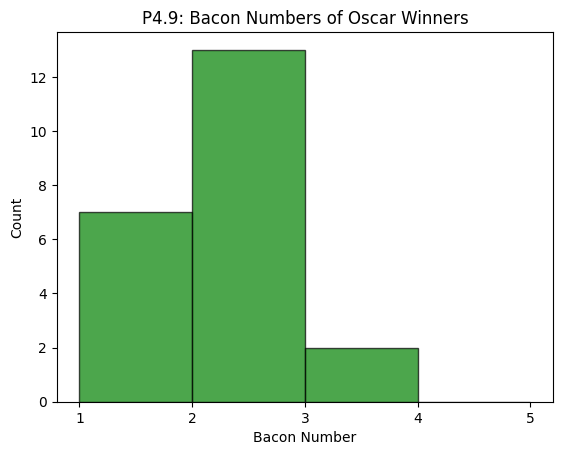

In [65]:
oscar_winners = {
    'Meryl Streep': 1,
    'Tom Hanks': 1, 
    'Leonardo DiCaprio': 2,
    'Katharine Hepburn': 2,
    'Jack Nicholson': 1,
    'Daniel Day-Lewis': 2,
    'Cate Blanchett': 2,
    'Robert De Niro': 1,
    'Anthony Hopkins': 2,
    'Denzel Washington': 2,
    'Nicole Kidman': 2,
    'Al Pacino': 2,
    'Emma Stone': 1,
    'Frances McDormand': 2,
    'Sean Penn': 1,
    'Julia Roberts': 1,
    'Marion Cotillard': 2,
    'Joaquin Phoenix': 2,
    'Brie Larson': 2,
    'Matthew McConaughey': 2,
    'Douglas Fairbanks': 3,
    'Mary Pickford': 3
}

plt.hist(oscar_winners.values(), bins=range(1, 6), alpha=0.7, color='green', edgecolor='black')
plt.xlabel('Bacon Number')
plt.ylabel('Count')
plt.title('P4.9: Bacon Numbers of Oscar Winners')
plt.xticks(range(1, 6))
plt.show()